In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
#train test 0 train 1 test
(train_images,train_labels)=mnist.load_data()[0]
(test_images,test_labels)=mnist.load_data()[1]

In [3]:
print("sahape of Train images",train_images.shape)
print("shape of test images",test_images.shape)

sahape of Train images (60000, 28, 28)
shape of test images (10000, 28, 28)


In [4]:
import matplotlib.pyplot as plt

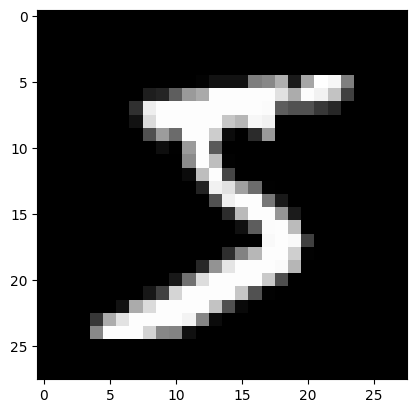

In [6]:
plt.imshow(train_images[0],cmap="gray")

In [7]:
# prepraring data
#önce 3 boyutlu verileri 4 boyutlu yapma
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

In [8]:
#normalize etmek
#veriler ondalıklı olmalıdır
print("sahape of Train images",train_images.shape)
print("shape of test images",test_images.shape)

sahape of Train images (60000, 28, 28, 1)
shape of test images (10000, 28, 28, 1)


In [21]:
train_images=train_images.astype("float32")
test_images=test_images.astype("float32")
train_images/=255
test_images/=255

In [22]:
#network oluşturmak

In [22]:
input_shape=(28,28,1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D

In [28]:
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu")) # 128 çıkış sayısını verir
model.add(Dropout(0.2)) #nöronlar arasındaki bağlantıyı keser ve başka nöronlar arasına bağlantı yapar
model.add(Dense(10,activation="softmax")) #istediğimiz değer softmax olduğu için 
#softmax olasılık hesabı yapar 110 istediğimiz çıktılardır


In [29]:
# compiling model (derleme)
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4732)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               605824    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

In [31]:
#fitting model 
history=model.fit(x=train_images,
                 y=train_labels,
                 epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: nan - accuracy: 0.0987
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: nan - accuracy: 0.0987
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: nan - accuracy: 0.0987
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: nan - accuracy: 0.0987
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: nan - accuracy: 0.0987
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: nan - accuracy: 0.0987
Epoch 7/10
1875/1875 [==============================] - 25s 14ms/step - loss: nan - accuracy: 0.0987
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: nan - accuracy: 0.0987
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: nan - accuracy: 0.0987
Epoch 10/10
1875/1875 [==============================] - 25s 13ms/step - loss: nan - accura

In [33]:
# evoluating model model başarısı testi
test_loss,test_accuracy=model.evaluate(test_images,test_labels)
print("test loss",test_loss)
print("test accuracy",test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.0980
test loss nan
test accuracy 0.09799999743700027


In [34]:
# lass accuracy graph 
history_dict=history.history
print("Keys",history_dict.keys())

Keys dict_keys(['loss', 'accuracy'])


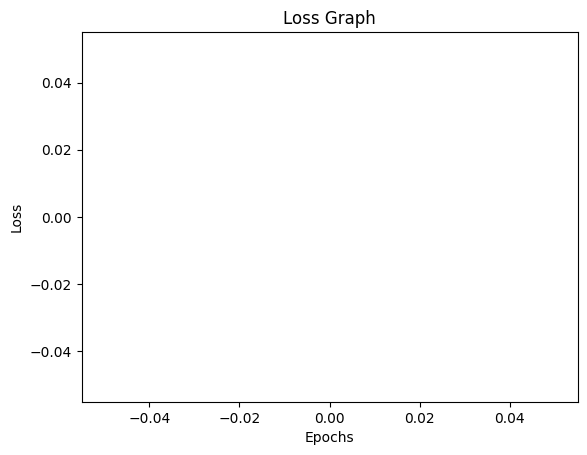

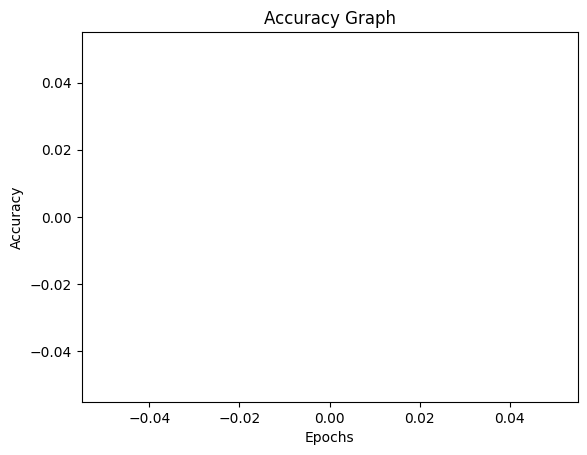

In [36]:
#lass accuracy graph
import matplotlib.pyplot as plt
epochs=range(1,11)
loss=history_dict["loss"]
plt.plot(epochs,loss)
plt.title("Loss Graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.plot(epochs,loss)
plt.title("Accuracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [38]:
# saving model
model.save("mnist_model.h5")

In [46]:
# load model

from tensorflow.keras.models import load_model
model=load_model("mnist_model.h5")
import random

In [47]:
i=random.randinit(1,50000)
prediction=model.predict(test_images[i],reshape(1,28,28,1))
plt.imshow(test_images[i].reshape(28,28),cmap="gary_r")

AttributeError: module 'random' has no attribute 'randinit'